# Developing a model for predicting F1 score for eating





**We are building a model for cow eating activties which can predict F1 score**

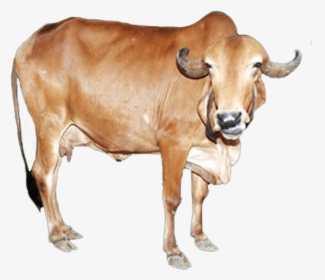

In [36]:
Image("127-1273104_clip-art-gyr-cattle-gir-cow-png-hd.png",)

In [32]:
#Importing tools  we need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

%matplotlib inline



In [3]:
#Importing dataset 
df=pd.read_csv("E1_train.csv")

In [4]:
df.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628308980,0.376465,0.860840,-0.114746,22.521973,-18.981934,15.075683,-297.0,1432.5,508.5,1
1,1628308980,0.325684,0.889160,-0.103516,25.085449,3.417969,12.756348,-292.5,1447.5,520.5,1
2,1628308980,0.269531,0.931641,-0.067383,24.353027,20.019531,11.352539,-297.0,1423.5,523.5,1
3,1628308980,0.225098,0.958008,-0.031250,19.104004,23.803711,7.019043,-297.0,1431.0,523.5,1
4,1628308980,0.204590,0.961426,-0.001953,15.258789,23.193359,2.807617,-286.5,1431.0,538.5,1


In [5]:
df.dtypes

time       int64
acc_x    float64
acc_y    float64
acc_z    float64
gyr_x    float64
gyr_y    float64
gyr_z    float64
mag_x    float64
mag_y    float64
mag_z    float64
label      int64
dtype: object

In [6]:
df.isna().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

In [7]:
df["label"].value_counts()

1    3405702
Name: label, dtype: int64

In [8]:
df.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,3.405702e+06,3.405702e+06,3.405702e+06,3.405702e+06,3.405702e+06,3.405702e+06,3.405702e+06,3.405702e+06,3.405702e+06,3.405702e+06,3405702.0
mean,1.628250e+09,-1.282399e-01,6.795792e-01,1.196239e-01,8.927934e-01,-1.881323e+00,-6.433156e-01,-2.332004e+02,4.198198e+02,1.626787e+02,1.0
std,1.203779e+05,2.088702e-01,6.604596e-01,1.791176e-01,1.289204e+01,2.087579e+01,1.089306e+01,1.276915e+02,5.977895e+02,4.292520e+02,0.0
min,1.628071e+09,-1.092188e+01,-1.002539e+01,-1.599121e+01,-1.999756e+03,-1.810547e+03,-1.430298e+03,-1.158000e+03,-8.790000e+02,-1.150500e+03,1.0
25%,1.628096e+09,-2.734375e-01,8.598633e-01,2.294920e-02,-5.432129e+00,-1.037598e+01,-5.493164e+00,-2.970000e+02,-6.600000e+01,5.100000e+01,1.0
50%,1.628313e+09,-1.508789e-01,9.355469e-01,1.230469e-01,7.934571e-01,-1.892090e+00,-6.103516e-01,-2.235000e+02,1.065000e+02,3.000000e+02,1.0
75%,1.628332e+09,3.027340e-02,9.848633e-01,2.182617e-01,7.080078e+00,6.530762e+00,4.333496e+00,-1.500000e+02,9.075000e+02,4.785000e+02,1.0
max,1.628400e+09,7.953613e+00,1.179102e+01,1.599854e+01,1.214966e+03,1.999939e+03,1.776306e+03,5.130000e+02,1.918500e+03,1.179000e+03,1.0


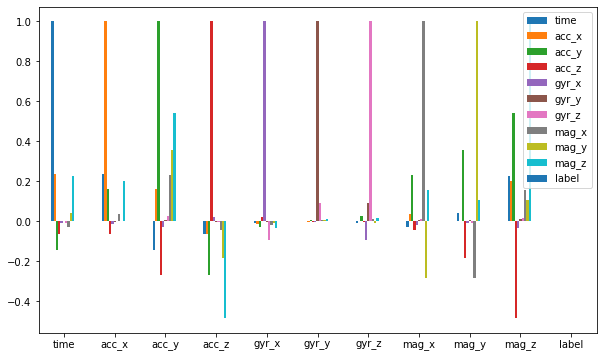

In [9]:
df.corr().plot(kind="bar",
              figsize=(10,6))
plt.xticks(rotation=0);

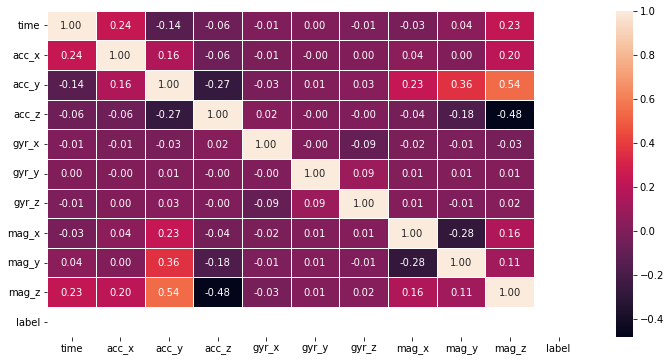

In [37]:
corr_mat = df.corr()
fig,ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(corr_mat,
                annot=True,
                linewidths=0.5,
                fmt=".2f")

In [11]:
# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split


# Creating X & y labels
X = df.drop("label",axis=1)
y = df["label"]

#Spillting the data into traning and testing
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)


In [12]:
X_train

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
354955,1628398164,0.137207,1.053223,0.043457,-13.061523,9.826660,-4.516602,-220.5,1530.0,363.0
691863,1628097470,0.033691,0.496094,-0.824707,-9.460449,-19.958496,3.906250,-393.0,655.5,-118.5
2926361,1628095188,-0.407227,0.910156,-0.009766,-2.685547,9.582520,3.967285,-360.0,901.5,637.5
1987451,1628087027,-0.398438,0.943359,0.193359,-13.366699,20.751953,0.183106,-243.0,82.5,27.0
296352,1628396362,0.114258,1.057617,0.133301,-1.647949,-12.573242,-5.432129,-147.0,1464.0,378.0
...,...,...,...,...,...,...,...,...,...,...
1710161,1628329793,-0.025879,0.947266,0.222656,-5.554199,-19.775391,-3.601074,-162.0,-153.0,463.5
1346836,1628094534,0.221191,1.078125,0.062500,2.685547,39.794922,-10.620117,-270.0,-250.5,424.5
1836529,1628397158,-0.080078,0.979492,0.199707,6.164551,-6.774902,-6.164551,-87.0,-175.5,639.0
1918902,1628071198,-0.288086,0.967285,0.119629,-0.793457,4.699707,-9.826660,-31.5,54.0,231.0


In [13]:
y_test

42661      1
575094     1
1752899    1
537312     1
2271466    1
          ..
2942150    1
1418836    1
2885816    1
2853423    1
1047167    1
Name: label, Length: 681141, dtype: int64

In [14]:
#Importing RandomForestregressor from sklearn's ensemble module 
from sklearn.ensemble import RandomForestRegressor


#instantiate an instant of RandomForestregressor as clf
clf = RandomForestRegressor()

In [15]:
clf.fit(X_train,y_train)

RandomForestRegressor()

In [16]:
clf.score(X_test, y_test)

1.0

In [17]:
y_preds = clf.predict(X_test)

In [18]:
y_preds

array([1., 1., 1., ..., 1., 1., 1.])

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_preds,y_test)

array([[681141]], dtype=int64)

In [25]:
#Importing classification reports
from sklearn.metrics import classification_report

# Creating Classification report by using classification report function
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00    681141

    accuracy                           1.00    681141
   macro avg       1.00      1.00      1.00    681141
weighted avg       1.00      1.00      1.00    681141



In [31]:
from sklearn.model_selection import cross_val_score

cross_val_f1=cross_val_score(clf,X,y,scoring="f1",cv=5)
cross_val_f1.mean()

1.0

In [38]:
# Importing F1 score from sklearn.metrics
from sklearn.metrics import f1_score


f1=f1_score(y_test,y_preds, average='weighted')


In [39]:
f1

1.0